In [104]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mc

import seaborn as sns

In [ ]:
import sys

!{sys.executable} -m pip install calplot
!{sys.executable} -m pip install calmap

import calplot
import calmap

# Seattle temperature

In [259]:
data= pd.read_csv('data/seattleWeather_1948-2017.csv')

data.columns= [x.lower() for x in data.columns]
data.head()

,date,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [260]:
# parse time
data['date']= pd.to_datetime(data['date'], format='%Y-%m-%d')

start_date= '2016-01-01'
end_date= '2016-12-31'

data= data.loc[(data['date']>= start_date) & (data['date']<= end_date)].reset_index(drop=True)
data= data.set_index('date')

data.head()

,prcp,tmax,tmin,rain
date,,,,
2016-01-01,0.00,46,28,False
2016-01-02,0.00,42,25,False
2016-01-03,0.02,40,31,True
2016-01-04,0.15,38,35,True
2016-01-05,0.11,46,36,True


# Calendar

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


Text(0.43, 1.08, 'Seattle minimum temperatures by month')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


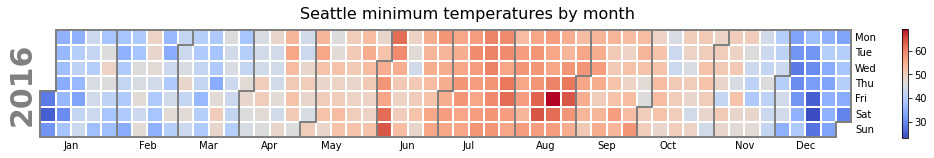

In [262]:
fig, ax= calplot.calplot(data['tmin'], 
                cmap= 'coolwarm', 
                linewidth=2,
                linecolor ="white" , fillcolor= "white", 
                figsize = (15, 2),
                colorbar=True);

fig.suptitle('Seattle minimum temperatures by month', fontsize=16, x=0.43, y=1.08)

#plt.savefig('calendar.pdf', pad_inches=0.01, bbox_inches="tight")

# Heatmap

In [263]:
data= pd.read_csv('data/seattleWeather_1948-2017.csv')

data.columns= [x.lower() for x in data.columns]

# parse time
data['date']= pd.to_datetime(data['date'], format='%Y-%m-%d')

start_date= '1997-01-01'
end_date= '2016-12-31'

data= data.loc[(data['date']>= start_date) & (data['date']<= end_date)].reset_index(drop=True)

data= data.drop(['rain','prcp'], axis= 1)

data.head()

,date,tmax,tmin
0,1997-01-01,55,48
1,1997-01-02,51,42
2,1997-01-03,44,39
3,1997-01-04,40,37
4,1997-01-05,42,34


In [264]:
months= pd.date_range('2024-01-01', '2024-12-31', freq='MS').strftime("%b").tolist()

In [265]:
# Groupa data by month and take mean values

per= data['date'].dt.to_period("M")

g_data= data.groupby(per).mean(['tmax', 'tmin'])
g_data= g_data.reset_index(drop=False)
g_data.head()

,date,tmax,tmin
0,1997-01,45.677419,36.451613
1,1997-02,48.392857,35.392857
2,1997-03,51.064516,38.419355
3,1997-04,56.900000,41.400000
4,1997-05,67.032258,49.290323


In [266]:
# Extract month, year and temperature
month= g_data['date'].dt.month
year = g_data['date'].dt.year
mtemp= g_data['tmin']

In [267]:
# Re-arrange temperature values
temp= mtemp.values.reshape(12, len(year.unique()), order="F")

xgrid= np.arange((year.max()-year.min()) + 1) + 1
ygrid= np.arange(12)

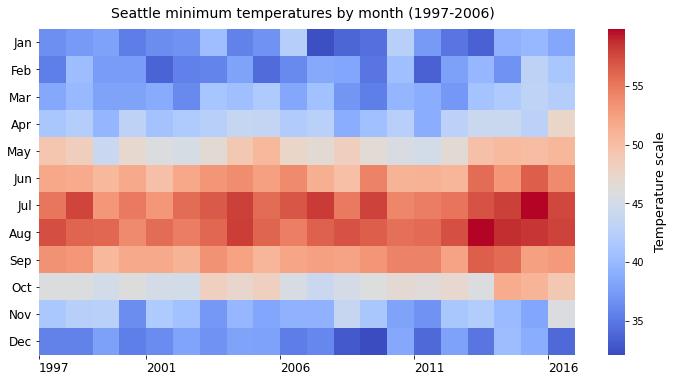

In [284]:
import matplotlib.dates as mdates
import math

fig, ax= plt.subplots(figsize= (12,6))

x_end= 2
xticks= np.arange(x_end)

sns.heatmap(temp, cmap= 'coolwarm', xticklabels=xticks)

plt.yticks(fontsize=12)
ax.set_yticklabels(months)
plt.setp(ax.get_yticklabels(), rotation=0)

plt.xticks(fontsize=12)
plt.xticks([0,4,9,14,19], [1997,2001,2006,2011,2016])
plt.xticks(ax.get_xticks(), rotation=0, ha='left', rotation_mode='anchor')

cbar= ax.collections[0].colorbar
cbar.set_label('Temperature scale', size=13, labelpad=10)

fig.suptitle('Seattle minimum temperatures by month (1997-2006)', fontsize=14, x=0.43, y=0.93)

plt.show()

#plt.savefig('heatmap.pdf', pad_inches=0.01, bbox_inches="tight")